# numpy и рандом

* ещё немного о типах
* рандомные функции из `numpy`
* породить распределение

In [1]:
import numpy as np

## Ещё немного о типах

### int vs uint

int -- обычное целое число (integer)<br>
uint -- unsigned integer (беззнаковое целое число).

In [6]:
a = np.array([127]).astype('int8')
b = np.array([127]).astype('uint8')

In [7]:
a

array([127], dtype=int8)

In [8]:
b

array([127], dtype=uint8)

Окей, в чём разница?

In [10]:
b + 1

array([128], dtype=uint8)

In [19]:
a + 1

array([-128], dtype=int8)

Что произошло?


Если тип объявлен как `int8` -- целое со знаком, то строку `11111111` мы интерпретируем как `-1`.

Компьютер смотрит на самый старший бит. Если это `1`, то число отрицательное, а модуль этого числа таков, чтобы если его прибавить к нынешнему значению, то получился бы `0`.

Если же старший бит равен `0`, то это число считается положительным.

Поэтому число `10000000` мы интерпретируем как
- во-первых, отрицательное
- во-вторых, его модуль равен x: `10000000 + x = 0` (но 0 мы имеем право заменить на `10000000`) => `x = 10000000`

Посмотрим на разницу на примере массивов:

In [20]:
c = np.arange(256)

In [21]:
c

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
c.astype('int8')

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127, -128, -127, -126, -125,
       -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114,
       -113, -112, -111, -110, -109, -108, -107, -1

### Булевские значения

То есть `True` или `False`.

In [23]:
a = np.arange(3)

In [24]:
a

array([0, 1, 2])

In [25]:
a.astype('bool')

array([False,  True,  True])

Что произошло? 0 --> `False`, другие числа --> `True`.

In [26]:
b = np.array(['hello', 'world', ''])
b

array(['hello', 'world', ''], dtype='<U5')

In [28]:
b.astype('bool')

ValueError: invalid literal for int() with base 10: 'hello'

А вот строки в `bool` не преобразуешь.

### Специальные значения

А ещё нескольким значениям (почти все биты равны 1) приписаны четыре значения:
 - +inf, -inf -- обозначают бесконечности
 - nan, snan -- обозначают Not A Number, то есть непойми что (snan мы никогда не увидим, оно сразу превращается питоном в ошибку)

In [12]:
float("+inf") + 1

inf

In [10]:
nan = float("nan")

In [11]:
nan

nan

In [53]:
inf = float("+inf")

In [54]:
1 / inf

0.0

In [55]:
inf / inf

nan

In [56]:
inf * 0

nan

In [57]:
1 / nan

nan

## Операции над массивами

### Операции сравнения на массивах

In [48]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
x > 5

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [50]:
x == 4

array([False, False, False, False,  True, False, False, False, False,
       False])

И даже так!

In [51]:
x + 1 == 2

array([False,  True, False, False, False, False, False, False, False,
       False])

Как это работает?
Сначала:

In [52]:
y = x + 1
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Потом:

In [40]:
y == 2

array([False,  True, False, False, False, False, False, False, False,
       False])

**Задание 1**: напишите код, порождающий массив из 200 элементов, где каждый через каждые четыре элемента значение `True`, а остальные `False`.

*(Подсказка: имеет смысл вспомнть, что делает оператор `%`)*

Результат должен получиться как в выдаче ячейки ниже:

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,

**Задание 2**: а теперь сделайте то же самое, но "со сдвигом" -- чтобы `True` начинались со второго элемента.

In [143]:
np.arange(200) % 4 == 1

array([False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,

### Маски

In [145]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
b = a > 5
b

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [79]:
a[b]

array([6, 7, 8, 9])

**Задание 3**: из массива, в котором 100 элементов, создайте массив, в котором лежат только числа, делящиеся на 3 или на 5.

In [151]:
a = np.arange(100)
a[(a % 3 == 0) | (a % 5 == 0) ]

array([ 0,  3,  5,  6,  9, 10, 12, 15, 18, 20, 21, 24, 25, 27, 30, 33, 35,
       36, 39, 40, 42, 45, 48, 50, 51, 54, 55, 57, 60, 63, 65, 66, 69, 70,
       72, 75, 78, 80, 81, 84, 85, 87, 90, 93, 95, 96, 99])

### Слайсы

Слайсы для массивов можно использовать так же, как и питоновские:

In [152]:
a = np.arange(-10, 10)
a

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [129]:
a[:5]

array([-10,  -9,  -8,  -7,  -6])

In [130]:
a[3:-3]

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6])

Но с многомерными массивами `numpy` умеет больше!

In [153]:
a = a.reshape(4, 5)
a

array([[-10,  -9,  -8,  -7,  -6],
       [ -5,  -4,  -3,  -2,  -1],
       [  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9]])

In [137]:
a[:2]

array([[-10,  -9,  -8,  -7,  -6],
       [ -5,  -4,  -3,  -2,  -1]])

In [138]:
a[:2, :2]

array([[-10,  -9],
       [ -5,  -4]])

In [140]:
a[:, :2]

array([[-10,  -9],
       [ -5,  -4],
       [  0,   1],
       [  5,   6]])

In [155]:
b = a.reshape(2, 2, 5)

In [156]:
b[:, :, :2]

array([[[-10,  -9],
        [ -5,  -4]],

       [[  0,   1],
        [  5,   6]]])

### mean

In [69]:
a = np.array([1, 2, 3, 4])

In [70]:
a.mean()

2.5

Загрузим какой-нибудь датасет чтобы поиграться с ним.

In [62]:
from sklearn import datasets
iris = datasets.load_iris().data

Это таблица из 4 столбцов: длина и ширина чашелистника, длина и ширина лепестка ирисов.

In [64]:
iris[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [65]:
len(iris)

150

**Задание 4**: Скажите, какая средняя ширина лепестка у ирисов, у которых длина чашелистника меньше 6, а какая у остальных?

In [160]:
iris.shape

(150, 4)

In [165]:
less_than_six = iris[:, :1] < 6

In [169]:
a = [1, 5, 7, 4, 3]
a[-1:]

[3]

In [170]:
shirina_lepestka = iris[:, -1:]

In [171]:
shirina_lepestka[less_than_six]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.3, 1.3,
       1. , 1.4, 1. , 1.5, 1.3, 1.5, 1. , 1.1, 1.8, 1. , 1.1, 1. , 1.2,
       1.5, 1.3, 1.3, 1.2, 1.2, 1. , 1.3, 1.2, 1.3, 1.1, 1.3, 1.9, 1.7,
       2. , 2.4, 2. , 1.9, 1.8])

In [173]:
np.mean(shirina_lepestka[less_than_six])

0.7

In [176]:
a = np.array([True, False])
np.invert(a)

array([False,  True])

In [179]:
inverted_vals = shirina_lepestka[np.invert(less_than_six)]
np.mean(inverted_vals)

1.8164179104477611

## numpy.random

Сгенерировать целое число от 0 до n:

In [184]:
a = np.random.randint(5)
a

3

In [188]:
np.random.randint(2, 15)

10

In [189]:
np.random.randint(2, 15, 5)

array([ 9,  7,  3, 13, 10])

Сгенерировать число от 0 до 1:

In [190]:
x = np.random.rand()
x

0.38875751362029953

In [196]:
np.round(70 * x)

27.0

### Нормальное распределение

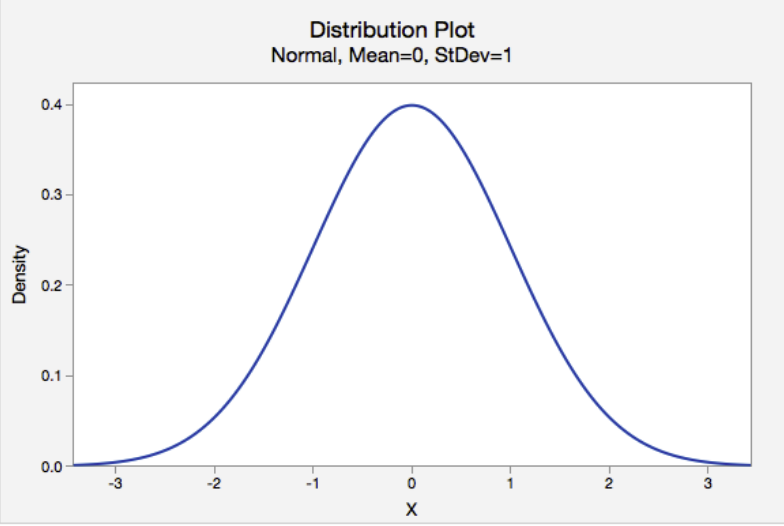

Сгененрировать число из нормального распределения:

In [96]:
np.random.normal()

0.6208849164549817

Сгенерировать 10 таких чисел:

In [97]:
np.random.normal(size=10)

array([-0.21169504, -0.47627852, -0.11380603,  0.04246706, -0.66186303,
        0.59635754, -0.23440136, -1.06085804,  0.94885253, -0.7665016 ])

### Равномерное распределение

Сгенерировать число:

In [118]:
np.random.uniform()

0.8333931033715744

Сгенерировать 4 числа:

In [117]:
np.random.uniform(size=4)

array([0.20124757, 0.50007487, 0.41378689, 0.47770595])

### choice

In [119]:
kittens = np.array(['black', 'white', 'white', 'jinger', 'black'])

In [123]:
np.random.choice(kittens)

'jinger'

In [124]:
np.random.choice(kittens, size=3)

array(['white', 'jinger', 'black'], dtype='<U6')

# Matplotlib

In [98]:
from matplotlib import pyplot

убедить matplotlib показывать картинки здесь же в notebook:

In [99]:
%matplotlib inline

In [107]:
x = np.arange(-5, 5)
x

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [108]:
y = x ** 2
y

array([25, 16,  9,  4,  1,  0,  1,  4,  9, 16])

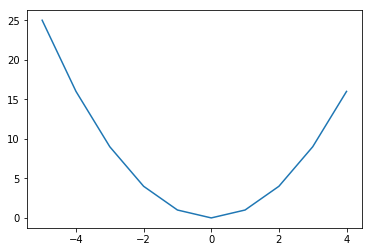

In [109]:
pyplot.plot(x, y)

А вот так будут выглядеть числа из нормального распределения:

In [110]:
x = np.arange(10)
y = np.random.normal(size=10)

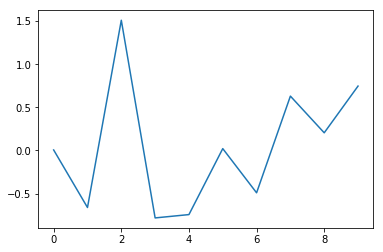

In [112]:
pyplot.plot(x, y)

### Гистограмы

(array([ 2.,  4.,  5.,  9., 19., 25., 21.,  9.,  4.,  2.]),
 array([-3.11473352, -2.56020826, -2.005683  , -1.45115774, -0.89663247,
        -0.34210721,  0.21241805,  0.76694331,  1.32146857,  1.87599383,
         2.4305191 ]),
 <a list of 10 Patch objects>)

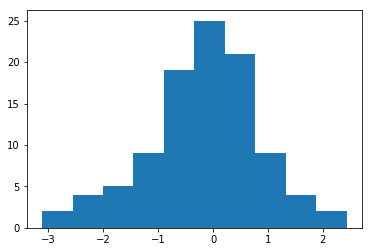

In [116]:
x = np.random.normal(size=100)
pyplot.hist(x)

**Задание n**: нарисуйте такую же гистограму для равномерного распределения.